In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 18 16:27:13 2022

@author: dm
"""
import os
import time
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas

# read only 10 lines (faster)
linesToRead = 10
data=pandas.read_excel('Pilot_006_JeEy_Stairs.xlsx', sheet_name ="Segment Position", nrows = linesToRead)


Get the names of the columns, and use that to get the names of the markers (1 marker = 3 columns)

In [2]:
columnName = data.columns.values

iStart = 1
iEnd = columnName.size
iStep = 3

columnName_X = columnName[iStart:iEnd:iStep]


columnName_X has an extra " x" at the end : get rid of the last 2 characters of each columnName_X, so to get markerName

In [3]:
markerName = columnName_X   # initialization
nMarkers = markerName.size

for i in range(nMarkers):
    columnName_X_i = columnName_X[i]
    markerName_i = columnName_X_i[:-2]  # suppress the las 2 characters 
    markerName[i] = markerName_i

We define a data array (not a dataframe), and suppress the first column (which contains the line number = not useful)

In [4]:
d = data.to_numpy()
d = d[:,1:]         # all lines, not col 0

Organize things a minimum : we want a list of marker, so that we can write  

A marker is a collection of :
* name 
* x,y,z = cartesian coordinates



In [5]:
class Marker:
    name = ''
    x = 0
    y = 0
    z = 0 

markers = [] # an array of object, that we will fill with markers  

# for each marker, move in the columns by jumps of 3 (a marker = 3 columns = x,y,z)  
for i in range(nMarkers): 
    newMarker = Marker()
    newMarker.name = markerName[i]
    iColumnX = i * 3        
    newMarker.x = d[:,iColumnX]
    newMarker.y = d[:,iColumnX+1]
    newMarker.z = d[:,iColumnX+2]
    markers.append(newMarker)

# output name + first value for x,y,z 
for i in range(nMarkers): 
    mi_name = markers[i].name
    mi_x0 = markers[i].x[0]
    mi_y0 = markers[i].y[0]
    mi_z0 = markers[i].z[0]
    print(f'{mi_name}: x[0]={mi_x0}, y[0]={mi_y0}, z[0]={mi_z0}')


Pelvis: x[0]=-1.46196868590492, y[0]=4.74019816641297, z[0]=0.926992007914265
L5: x[0]=-1.44590192090815, y[0]=4.71669717391001, z[0]=1.01652976933607
L3: x[0]=-1.44289428782126, y[0]=4.71901424281646, z[0]=1.10895435640256
T12: x[0]=-1.43909604704246, y[0]=4.72003390959786, z[0]=1.19338541702291
T8: x[0]=-1.43902327544229, y[0]=4.72765531799934, z[0]=1.27746878805944
Neck: x[0]=-1.44987329843965, y[0]=4.75453559916473, z[0]=1.38868640456238
Head: x[0]=-1.44802322589977, y[0]=4.79399716466113, z[0]=1.4815236795251
Right Shoulder: x[0]=-1.42451697892987, y[0]=4.75475942909407, z[0]=1.3383723672554
Right Upper Arm: x[0]=-1.33091878765181, y[0]=4.83022089530976, z[0]=1.31232968178762
Right Forearm: x[0]=-1.3115064649907, y[0]=4.80059701879076, z[0]=1.04565218709825
Right Hand: x[0]=-1.2982130220245, y[0]=4.78317192491316, z[0]=0.828907683532132
Left Shoulder: x[0]=-1.46432267775919, y[0]=4.72733644230415, z[0]=1.34112351926151
Left Upper Arm: x[0]=-1.57323410036955, y[0]=4.67276963267575,

With this structure we can plot

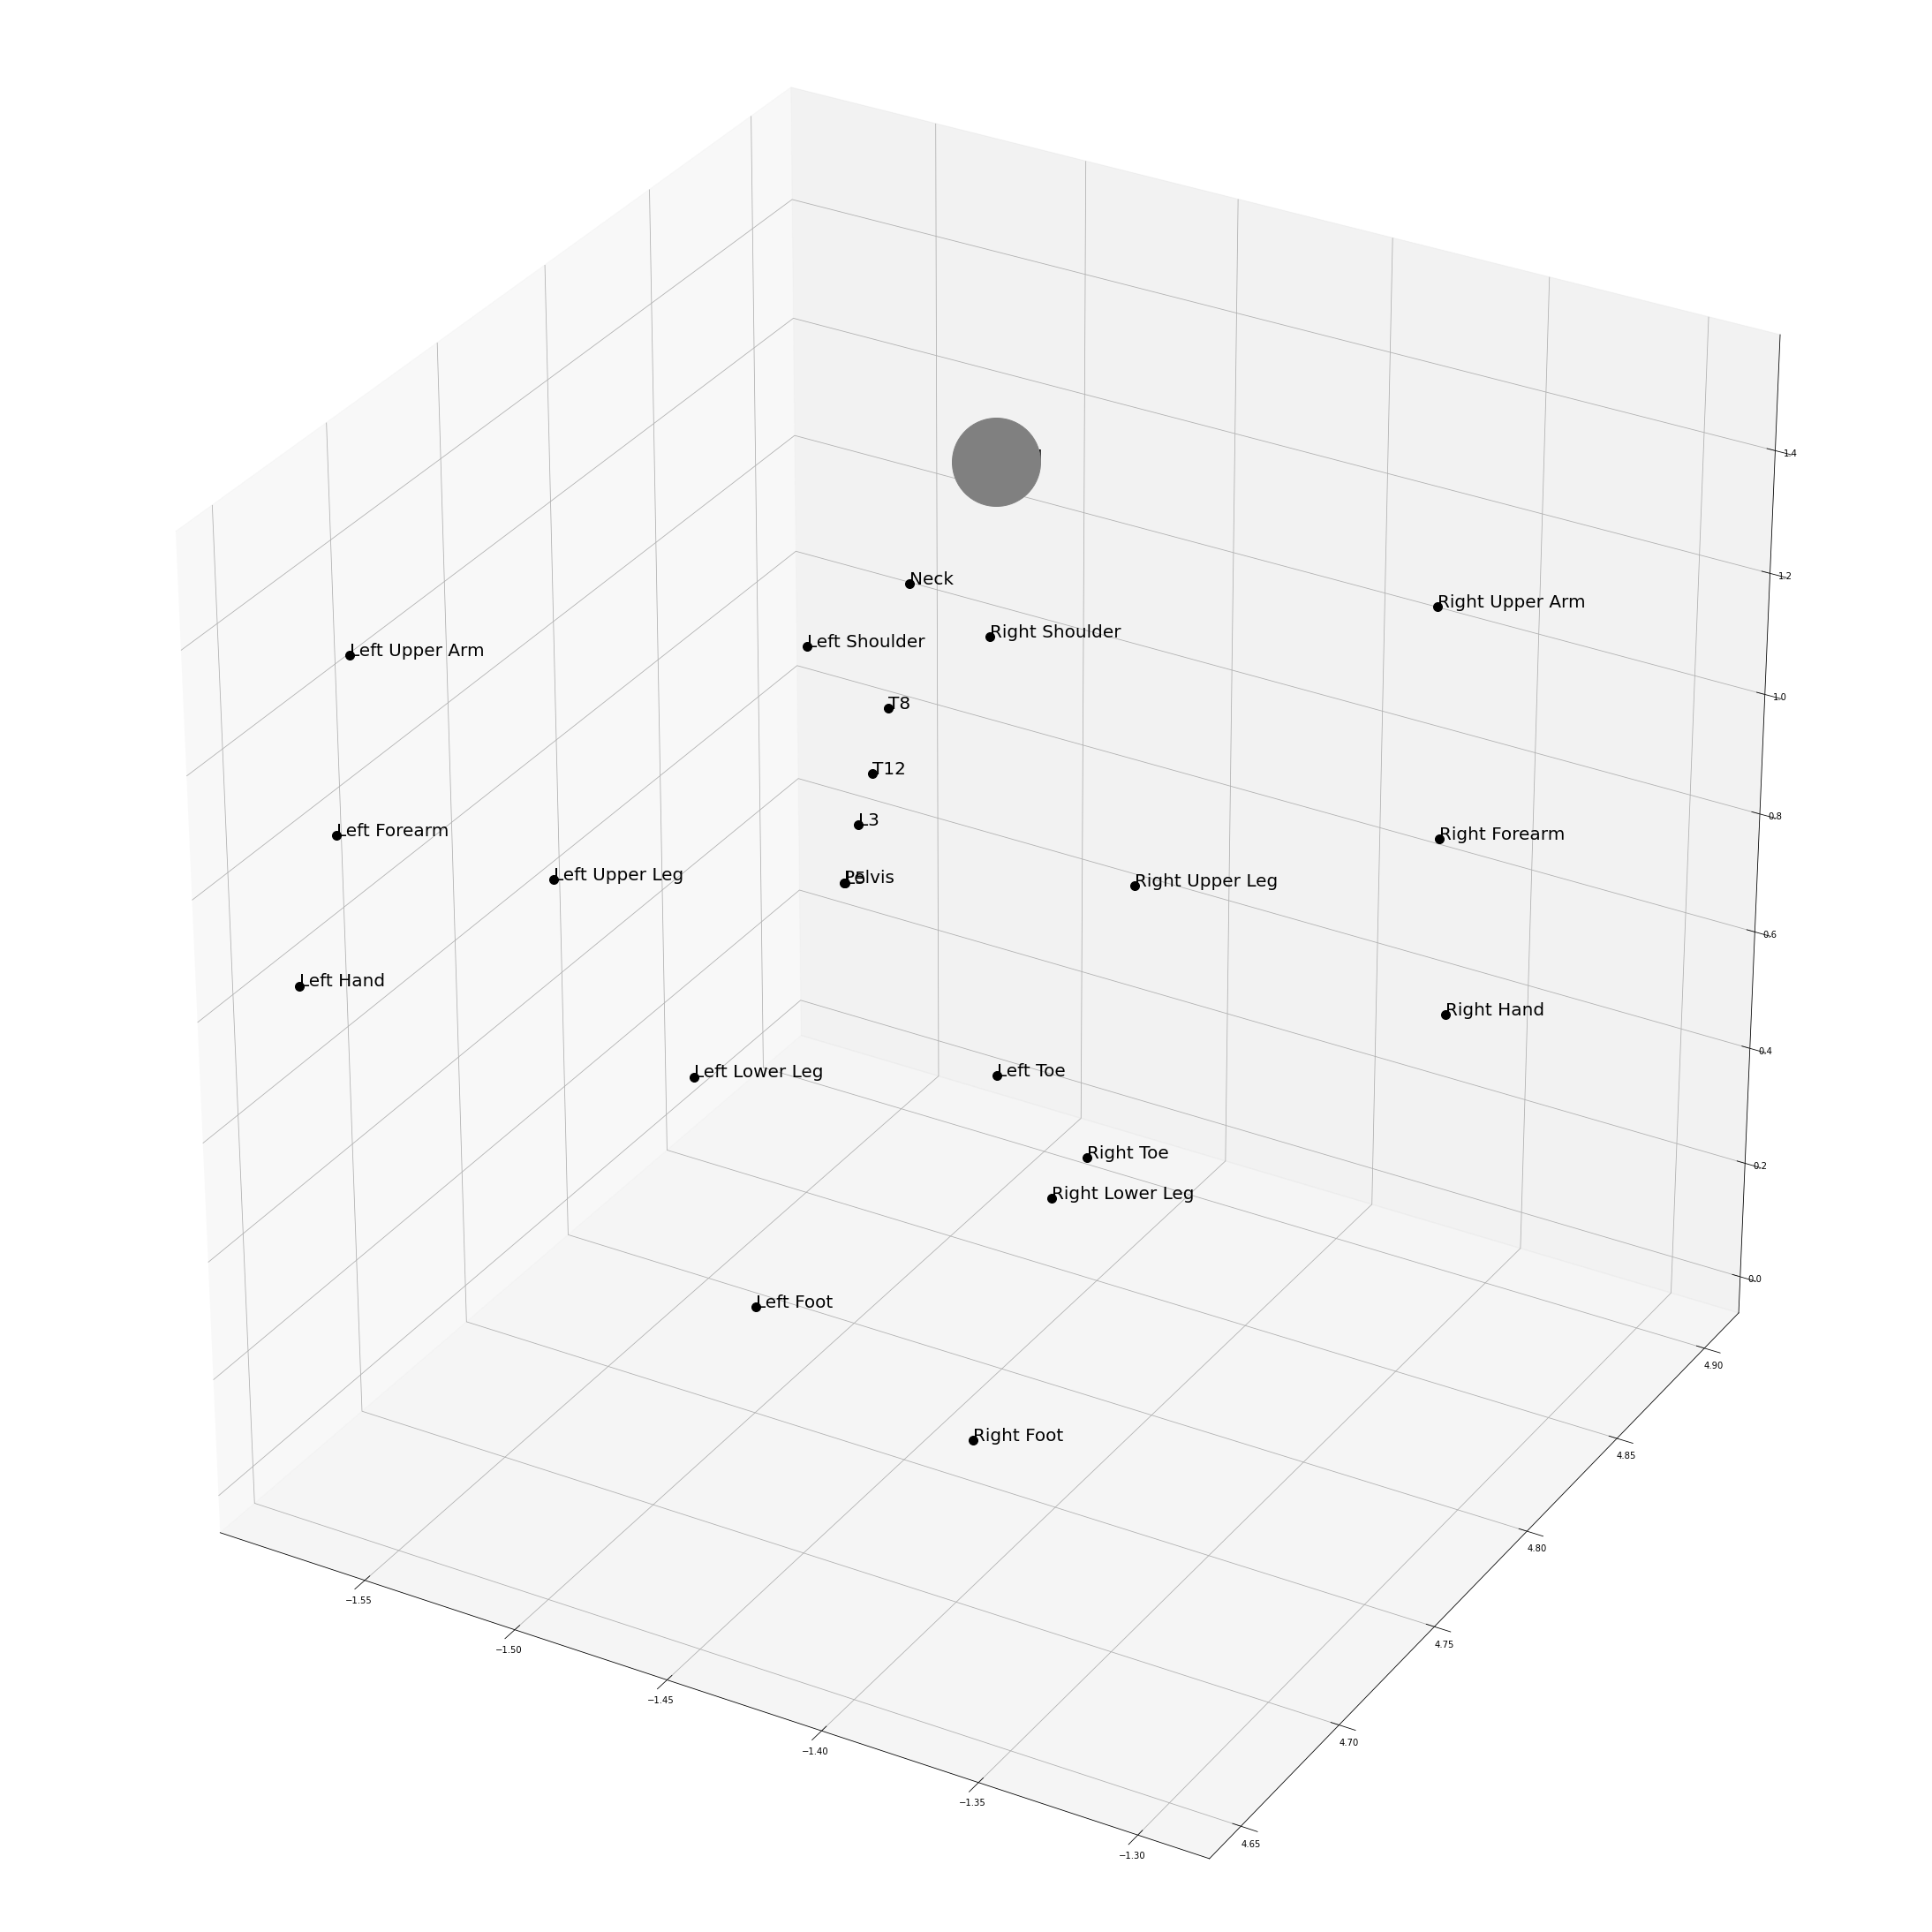

In [6]:
# from Eya's code

fig = plt.figure(figsize=(40,40))
ax = plt.axes(projection='3d')

ax.set_box_aspect([1,1,1]) # not sure this does something usefull 


# plot the markers (with labels)
# TODO: make it a method of Marker 
iImage = 0; # image number (line in the  data file)
for i in range (nMarkers):
    x=markers[i].x[iImage]
    y=markers[i].y[iImage]
    z=markers[i].z[iImage]
    label = markers[i].name
    ax.scatter(x,y,z,s=100, marker='o', color = 'k')            # small dot marker 
    ax.text(x,y,z,'%s' % (label), size=20, zorder=1,)           # label of merker
    if i == 6 :
        ax.scatter(x,y,z,s=10000, marker='o', color = 'grey')   # big grey head 


Create the links : here, this is done by hand using loops among adjacent markers

In [7]:
class Link: 
    #TODO : explain what is __init__ and how it works. 
    def __init__(self, marker1, marker2, color):      
        self.marker1 = marker1
        self.marker2 = marker2
        self.color = color


# we shall built a list of Links 
links = []

 # Axial links in black
for i in range(0,6):   
    newLink =  Link(i, i+1, 'k')               
    links.append(newLink)

 # Neck <-> Right Shoulder
links.append(Link(5, 7, 'k'))          

 # Upper limb Right
for i in range(7,10):                  
    links.append(Link(i, i+1, 'b'))

# Neck <-> Left Shoulder
links.append(Link(5, 11, 'k'))          

# Upper limb Left 
for i in range(11,14):
    links.append(Link(i, i+1, 'r'))
    
# TODO : add lower limbs 

List and plot the links 

In [8]:
nLinks = len(links)

# list the links 
# TODO : make it a method of Link 
for i in range(nLinks):
    print(f'{markerName[links[i].marker1]} <-> {markerName[links[i].marker2]} : {links[i].color}')

# display the links 
# TODO : make it a method of Link 
# for i in range(nLinks):
#     iMk1 = links[i].marker1
#     iMk2 = links[i].marker2

#     VecStart_x = markers[iMk1].x[iImage]
#     VecEnd_x   = markers[iMk2].x[iImage]

#     VecStart_y = markers[iMk1].y[iImage]
#     VecEnd_y   = markers[iMk2].y[iImage]

#     VecStart_z = markers[iMk1].z[iImage]
#     VecEnd_z   = markers[iMk2].z[iImage]

#     ax.plot([VecStart_x, VecEnd_x], [VecStart_y,VecEnd_y],zs=[VecStart_z,VecEnd_z], color= links[i].color, linewidth=5.0)

# fig

Pelvis <-> L5 : k
L5 <-> L3 : k
L3 <-> T12 : k
T12 <-> T8 : k
T8 <-> Neck : k
Neck <-> Head : k
Neck <-> Right Shoulder : k
Right Shoulder <-> Right Upper Arm : b
Right Upper Arm <-> Right Forearm : b
Right Forearm <-> Right Hand : b
Neck <-> Left Shoulder : k
Left Shoulder <-> Left Upper Arm : r
Left Upper Arm <-> Left Forearm : r
Left Forearm <-> Left Hand : r


Create a function (method) to plot ONE image (ONE line in the file)


plot_image (i)

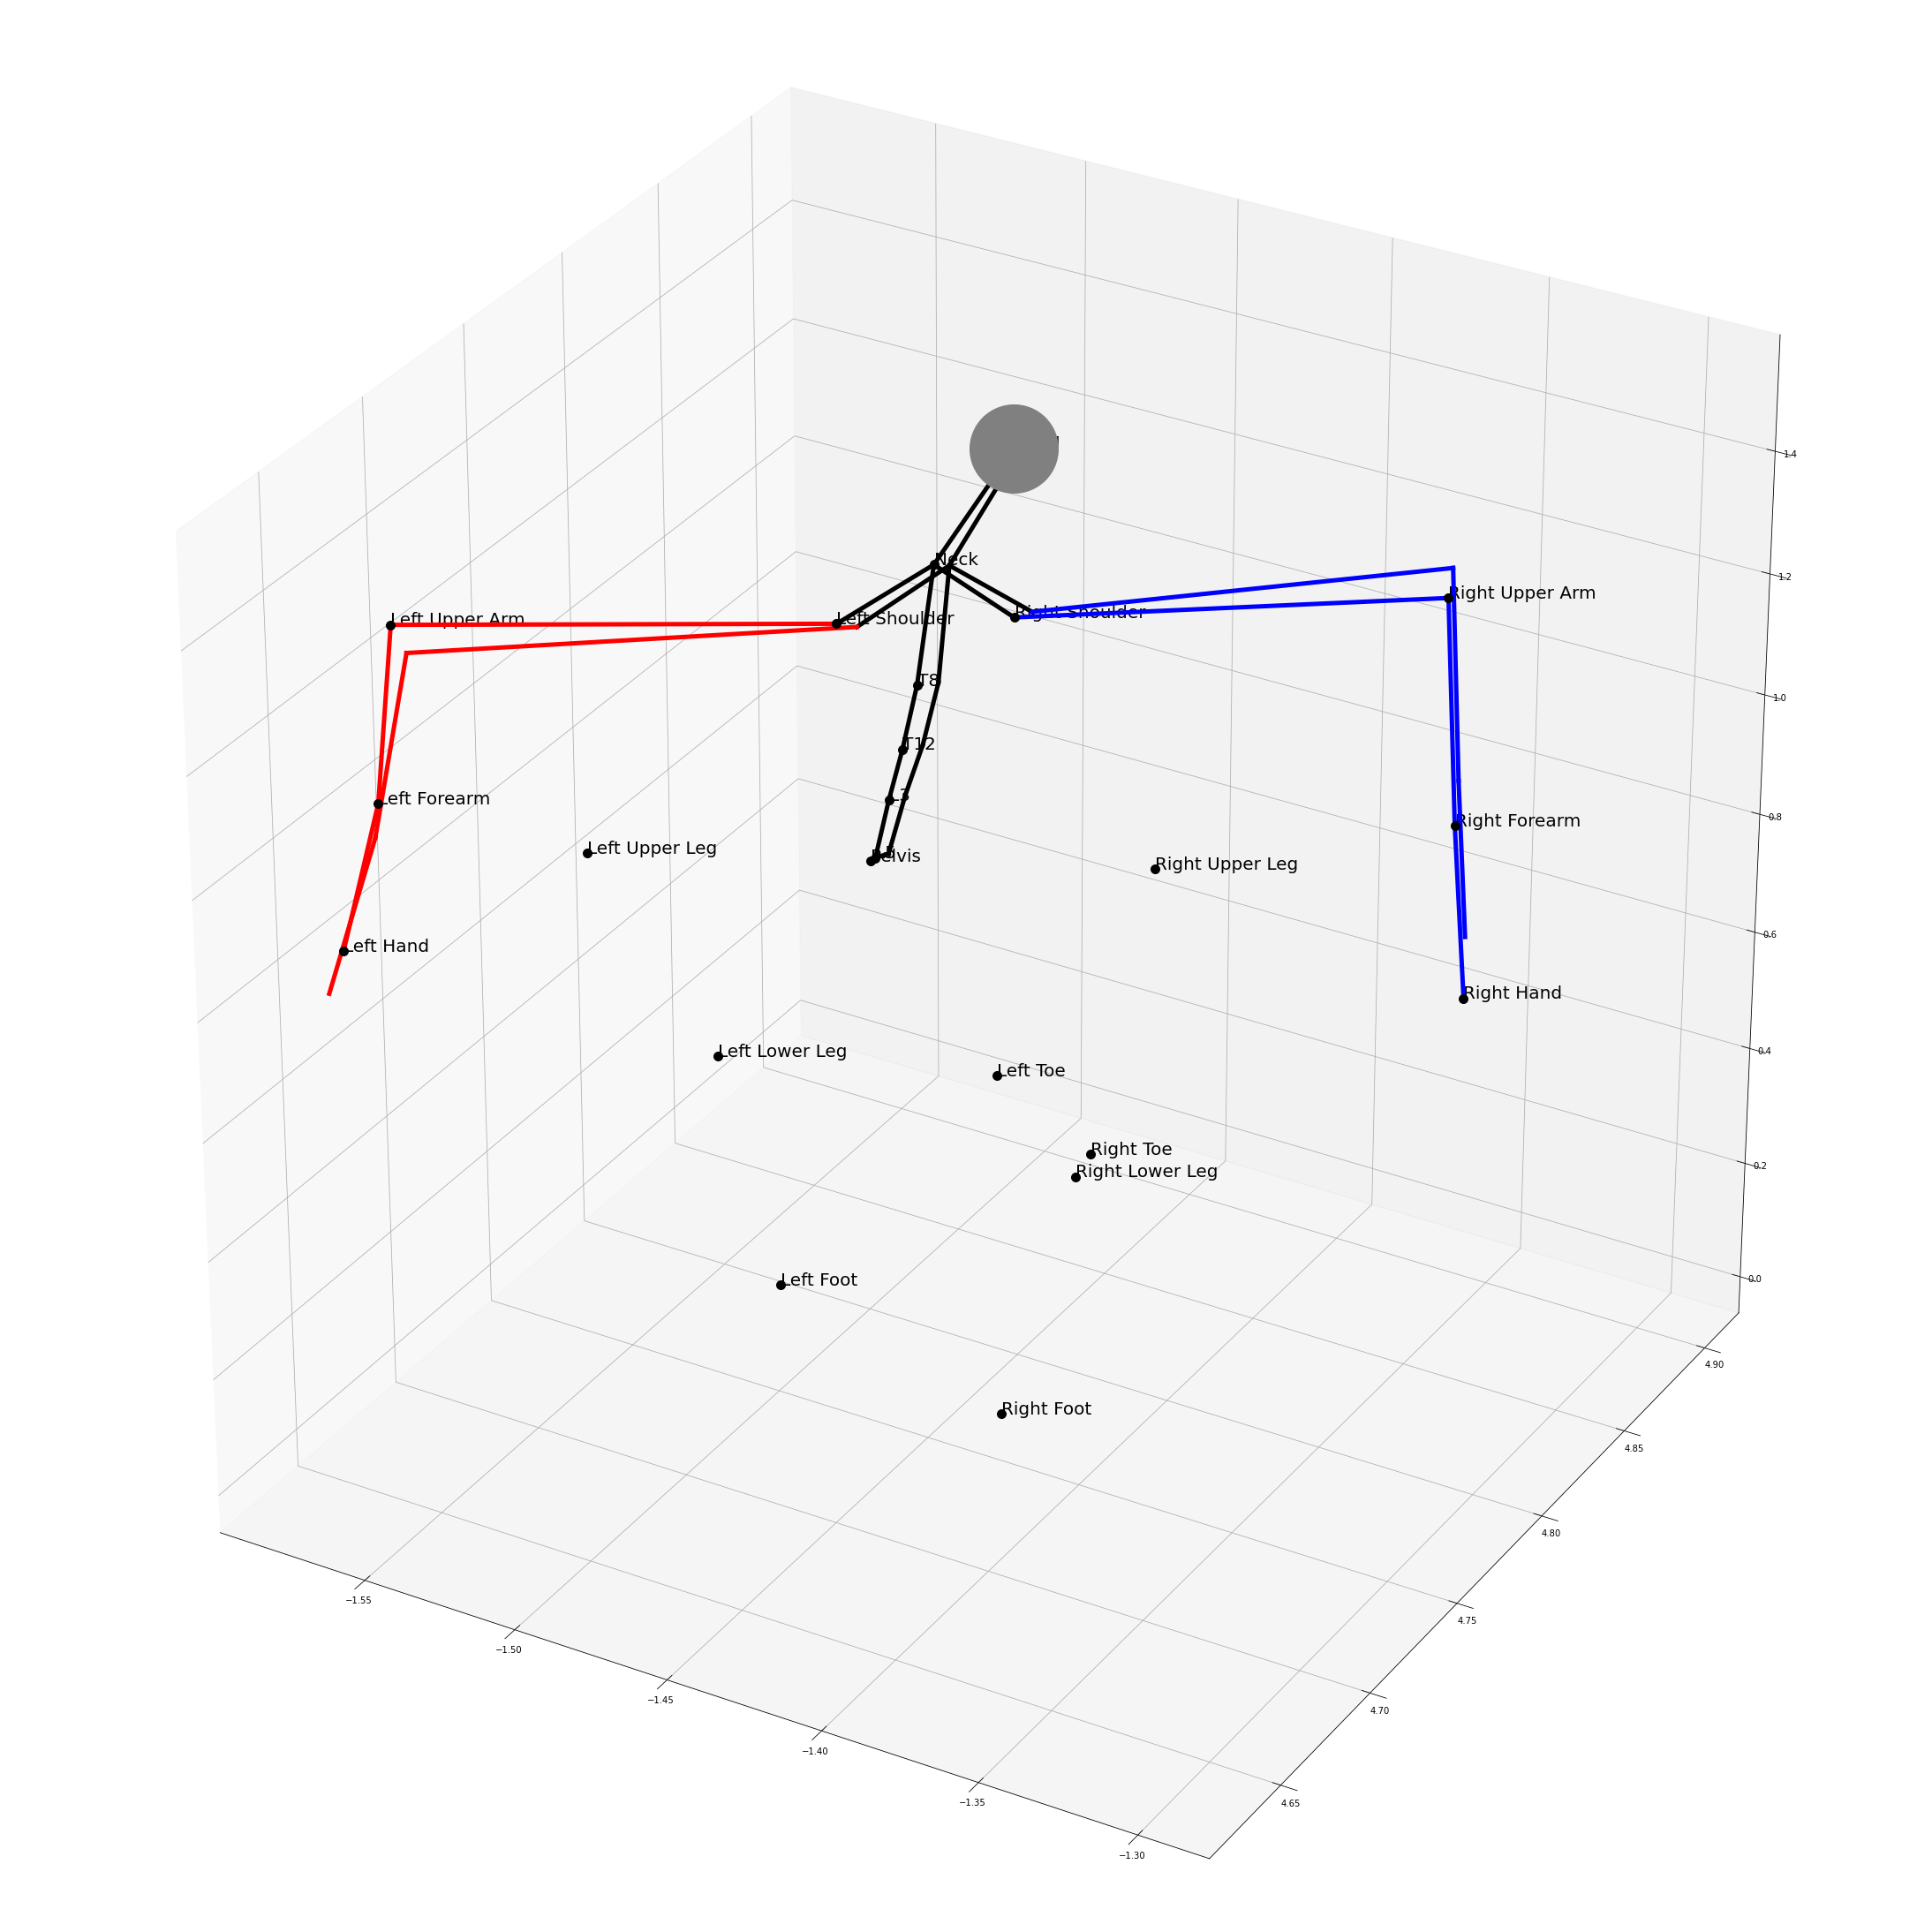

In [10]:
class Skeleton: 
    markers = []
    links = []
    def __init__(self, markers, links):      
        self.markers = markers
        self.links = links

    def plot_image(self, iImage, ax): 
        nLinks = len(links)
        for i in range(nLinks):
            iMk1 = links[i].marker1
            iMk2 = links[i].marker2

            VecStart_x = markers[iMk1].x[iImage]
            VecEnd_x   = markers[iMk2].x[iImage]

            VecStart_y = markers[iMk1].y[iImage]
            VecEnd_y   = markers[iMk2].y[iImage]

            VecStart_z = markers[iMk1].z[iImage]
            VecEnd_z   = markers[iMk2].z[iImage]

            ax.plot([VecStart_x, VecEnd_x], [VecStart_y,VecEnd_y],zs=[VecStart_z,VecEnd_z], color= links[i].color, linewidth=5.0)
        


skeleton = Skeleton(markers, links)
skeleton.plot_image(8, ax)
fig